## Agenda for Day 7 Part 2: (session 9)
- Date: 21/02/2020 Evening 6:30 -  10:00

### Data Visualization
    - matplotlib, seaborn

## some advanced pandas feature...

In [ ]:
# 1. concat, merge , join

In [19]:
import seaborn as sns
import pandas as pd
tipsdf = sns.load_dataset('tips')
flightsdf = sns.load_dataset('flights')

In [20]:
df1 = flightsdf.head(3).copy()
df1.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132

In [32]:
df2 = flightsdf.loc[4:9].copy()
df2["dummy"] = 10
df2

year      month  passengers  dummy
4  1949        May         121     10
5  1949       June         135     10
6  1949       July         148     10
7  1949     August         148     10
8  1949  September         136     10
9  1949    October         119     10

In [35]:
combined_df = pd.concat([df1, df2], axis=0)
combined_df

year      month  passengers  dummy
0  1949    January         112    NaN
1  1949   February         118    NaN
2  1949      March         132    NaN
4  1949        May         121   10.0
5  1949       June         135   10.0
6  1949       July         148   10.0
7  1949     August         148   10.0
8  1949  September         136   10.0
9  1949    October         119   10.0

In [36]:
df1.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132

In [39]:
df3 = tipsdf[['total_bill','tip']].head(3).copy()
df3

total_bill   tip
0       16.99  1.01
1       10.34  1.66
2       21.01  3.50

In [40]:
pd.concat([df1, df3], axis=1)

year     month  passengers  total_bill   tip
0  1949   January         112       16.99  1.01
1  1949  February         118       10.34  1.66
2  1949     March         132       21.01  3.50

In [45]:
from pathlib import Path
p = Path(r"C:\Users\balap\Downloads")absolute

<generator object Path.glob at 0x0000021067B4A048>

In [56]:
fnames = list(p.glob("????.csv"))
dfs = []
for fname in fnames:
    cdf = pd.read_csv(fname)
    cdf['company'] = str(fname.name).replace(".csv",'')
    dfs.append(cdf)
    
len(dfs)

2

In [59]:
combdf = pd.concat(dfs, axis=0)

In [60]:
combdf.head()

Date        Open        High         Low       Close   Adj Close  \
0  2019-02-21  171.800003  172.369995  170.300003  171.059998  168.849930   
1  2019-02-22  171.580002  173.000000  171.380005  172.970001  170.735229   
2  2019-02-25  174.160004  175.869995  173.949997  174.229996  171.978958   
3  2019-02-26  173.710007  175.300003  173.169998  174.330002  172.077667   
4  2019-02-27  173.210007  175.000000  172.729996  174.869995  172.610687   

     Volume company  
0  17249700    AAPL  
1  18913200    AAPL  
2  21873400    AAPL  
3  17070200    AAPL  
4  27835400    AAPL

In [65]:
df1 = dfs[0].copy()
df2 = dfs[1].copy()


df1 = df1[['Date','Adj Close', 'company']]
df2 = df2[['Date','Adj Close', 'company']]

In [69]:
df1.set_index("Date", inplace=True)
df1.head()

Adj Close company
Date                          
2019-02-21  168.849930    AAPL
2019-02-22  170.735229    AAPL
2019-02-25  171.978958    AAPL
2019-02-26  172.077667    AAPL
2019-02-27  172.610687    AAPL

In [70]:
df2.set_index("Date", inplace=True)
df2.head()

Adj Close company
Date                           
2019-02-21  1096.969971    GOOG
2019-02-22  1110.369995    GOOG
2019-02-25  1109.400024    GOOG
2019-02-26  1115.130005    GOOG
2019-02-27  1116.050049    GOOG

In [71]:
pd.concat([  df1.head(2), df2.head(2) ], axis=1)

Adj Close company    Adj Close company
Date                                               
2019-02-21  168.849930    AAPL  1096.969971    GOOG
2019-02-22  170.735229    AAPL  1110.369995    GOOG

In [81]:
comdf = pd.merge(df1, df2, how="inner",left_index=True, right_index=True )
final = comdf.reset_index().drop(columns=['company_x','company_y']).rename(columns={"Adj Close_x": "AAPL", "Adj Close_y":"GOOG"})
final

Date        AAPL         GOOG
0    2019-02-21  168.849930  1096.969971
1    2019-02-22  170.735229  1110.369995
2    2019-02-25  171.978958  1109.400024
3    2019-02-26  172.077667  1115.130005
4    2019-02-27  172.610687  1116.050049
..          ...         ...          ...
247  2020-02-13  324.869995  1514.660034
248  2020-02-14  324.950012  1520.739990
249  2020-02-18  319.000000  1519.670044
250  2020-02-19  323.619995  1526.689941
251  2020-02-20  320.299988  1518.150024

[252 rows x 3 columns]

In [99]:
final

Date        AAPL         GOOG
0 2019-02-21  168.849930  1096.969971
1 2019-02-22  170.735229  1110.369995
2 2019-02-25  171.978958  1109.400024
3 2019-02-26  172.077667  1115.130005
4 2019-02-27  172.610687  1116.050049

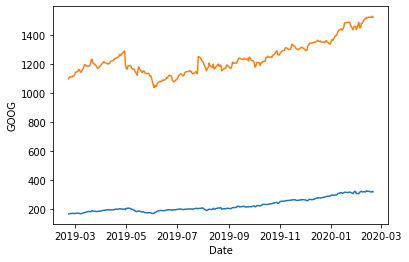

In [98]:
final['Date'] = pd.to_datetime(final['Date'])

sns.lineplot(x="Date", y="AAPL", data=final)
sns.lineplot(x="Date", y="GOOG", data=final)

In [113]:
final.head(3)

Date        AAPL         GOOG
0 2019-02-21  168.849930  1096.969971
1 2019-02-22  170.735229  1110.369995
2 2019-02-25  171.978958  1109.400024

In [103]:
final_melted = final.melt(id_vars=['Date'], value_vars=['AAPL','GOOG'],  var_name='SYMBOL', value_name='AdjClose')
final_melted.head(3)

Date SYMBOL    AdjClose
0 2019-02-21   AAPL  168.849930
1 2019-02-22   AAPL  170.735229
2 2019-02-25   AAPL  171.978958

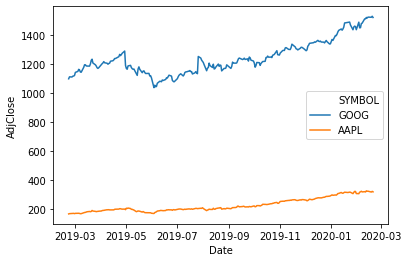

In [109]:
sns.lineplot(x="Date", y="AdjClose", data=final_melted.sort_values('Date',ascending=False), hue="SYMBOL")

In [110]:
final.head(2)

Date        AAPL         GOOG
0 2019-02-21  168.849930  1096.969971
1 2019-02-22  170.735229  1110.369995

In [112]:
import plotly.express as px

fig = px.line(final, x="Date", y="AAPL", title='AAPL - Adj-Close')
fig.show()

In [118]:
final.head()

Date        AAPL         GOOG
0 2019-02-21  168.849930  1096.969971
1 2019-02-22  170.735229  1110.369995
2 2019-02-25  171.978958  1109.400024
3 2019-02-26  172.077667  1115.130005
4 2019-02-27  172.610687  1116.050049

In [175]:
def func(s):
    if s.AAPL > s.GOOG:
        return "AAPL", s.AAPL
    else:
        return "GOOG", s.GOOG
final["who_is_greater"]= final.apply(func, axis=1)
final.head()

Date        AAPL         GOOG       who_is_greater
0 2019-02-21  168.849930  1096.969971  (GOOG, 1096.969971)
1 2019-02-22  170.735229  1110.369995  (GOOG, 1110.369995)
2 2019-02-25  171.978958  1109.400024  (GOOG, 1109.400024)
3 2019-02-26  172.077667  1115.130005  (GOOG, 1115.130005)
4 2019-02-27  172.610687  1116.050049  (GOOG, 1116.050049)

In [177]:
def func(s):
    if s.AAPL > s.GOOG:
        return pd.Series(["AAPL", s.AAPL])
    else:
        return pd.Series(["GOOG", s.GOOG])
last2cols = final.apply(func, axis=1)
last2cols.columns = ['who_is_big', "its_value"]
pd.concat([final, last2cols],axis=1)
# final
# last2cols

Date        AAPL         GOOG       who_is_greater who_is_big  \
0   2019-02-21  168.849930  1096.969971  (GOOG, 1096.969971)       GOOG   
1   2019-02-22  170.735229  1110.369995  (GOOG, 1110.369995)       GOOG   
2   2019-02-25  171.978958  1109.400024  (GOOG, 1109.400024)       GOOG   
3   2019-02-26  172.077667  1115.130005  (GOOG, 1115.130005)       GOOG   
4   2019-02-27  172.610687  1116.050049  (GOOG, 1116.050049)       GOOG   
..         ...         ...          ...                  ...        ...   
247 2020-02-13  324.869995  1514.660034  (GOOG, 1514.660034)       GOOG   
248 2020-02-14  324.950012  1520.739990   (GOOG, 1520.73999)       GOOG   
249 2020-02-18  319.000000  1519.670044  (GOOG, 1519.670044)       GOOG   
250 2020-02-19  323.619995  1526.689941  (GOOG, 1526.689941)       GOOG   
251 2020-02-20  320.299988  1518.150024  (GOOG, 1518.150024)       GOOG   

       its_value  
0    1096.969971  
1    1110.369995  
2    1109.400024  
3    1115.130005  
4    1116.050049  
..           ...  
247  1514.660034  
248  1520.739990  
249  1519.670044  
250  1526.689941  
251  1518.150024  

[252 rows x 6 columns]

In [187]:
# 2020-02-18
# final.query('Date=="2020-02-18" & AAPL > 20')



# mask = final.Date == "2020-02-18"
# final.loc[mask]
# final[mask]
# final.where(mask)

In [117]:
final_melted.head()

Date SYMBOL    AdjClose
0 2019-02-21   AAPL  168.849930
1 2019-02-22   AAPL  170.735229
2 2019-02-25   AAPL  171.978958
3 2019-02-26   AAPL  172.077667
4 2019-02-27   AAPL  172.610687

In [121]:
final_pivoted = pd.pivot_table(final_melted,index='Date', values='AdjClose', columns='SYMBOL')
final_pivoted.head()

SYMBOL            AAPL         GOOG
Date                               
2019-02-21  168.849930  1096.969971
2019-02-22  170.735229  1110.369995
2019-02-25  171.978958  1109.400024
2019-02-26  172.077667  1115.130005
2019-02-27  172.610687  1116.050049

In [132]:
# final_pivoted.loc['2019']

In [157]:
final_melted.head()

Date SYMBOL    AdjClose
0 2019-02-21   AAPL  168.849930
1 2019-02-22   AAPL  170.735229
2 2019-02-25   AAPL  171.978958
3 2019-02-26   AAPL  172.077667
4 2019-02-27   AAPL  172.610687

In [147]:
grp = final_melted.head(5).groupby(['Date'])[['SYMBOL','AdjClose']]

def func(sdf):
    display(sdf)
    return "AAPL"
grp.apply(func)

SYMBOL   AdjClose
0   AAPL  168.84993

SYMBOL    AdjClose
1   AAPL  170.735229

SYMBOL    AdjClose
2   AAPL  171.978958

SYMBOL    AdjClose
3   AAPL  172.077667

SYMBOL    AdjClose
4   AAPL  172.610687

Date
2019-02-21    AAPL
2019-02-22    AAPL
2019-02-25    AAPL
2019-02-26    AAPL
2019-02-27    AAPL
dtype: object

In [135]:
final_melted.set_index(['SYMBOL','Date',])

AdjClose
SYMBOL Date                   
AAPL   2019-02-21   168.849930
       2019-02-22   170.735229
       2019-02-25   171.978958
       2019-02-26   172.077667
       2019-02-27   172.610687
...                        ...
GOOG   2020-02-13  1514.660034
       2020-02-14  1520.739990
       2020-02-18  1519.670044
       2020-02-19  1526.689941
       2020-02-20  1518.150024

[504 rows x 1 columns]

## Visualization

In [30]:
# from typing import Union
# def dummy(a: Union[int,str]):
#     print(a)

# plot based on series

In [192]:
series = final.groupby('Date')['AAPL'].sum()
series

Date
2019-02-21    168.849930
2019-02-22    170.735229
2019-02-25    171.978958
2019-02-26    172.077667
2019-02-27    172.610687
                 ...    
2020-02-13    324.869995
2020-02-14    324.950012
2020-02-18    319.000000
2020-02-19    323.619995
2020-02-20    320.299988
Name: AAPL, Length: 252, dtype: float64

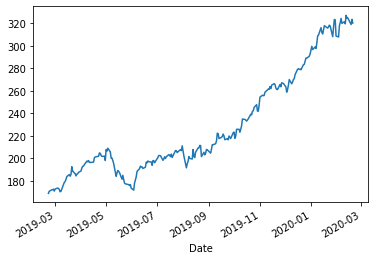

In [194]:
import matplotlib.pyplot as plt
series.plot(kind="line")

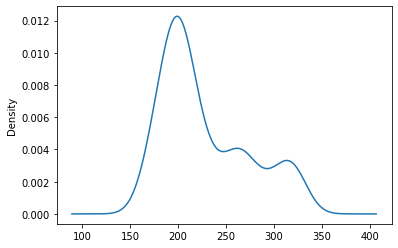

In [197]:
series.plot(kind="density")

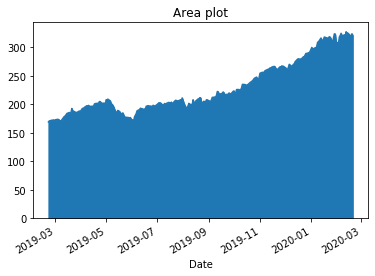

In [214]:
plt.title("Area plot")
series.plot(kind="area")

In [200]:
# series.plot(kind="hist")

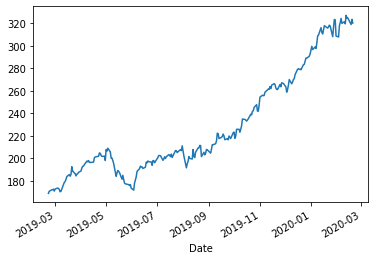

In [211]:
#control fig size
fig = plt.figure(figsize=(10,5))

series.plot(kind="line")
plt.savefig("myoutput.png")
# fig.savefig("myoutput.png")

In [222]:
final.who_is_greater.apply(lambda x: x[0] ).value_counts()

GOOG    252
Name: who_is_greater, dtype: int64

In [223]:
final.head()

Date        AAPL         GOOG       who_is_greater
0 2019-02-21  168.849930  1096.969971  (GOOG, 1096.969971)
1 2019-02-22  170.735229  1110.369995  (GOOG, 1110.369995)
2 2019-02-25  171.978958  1109.400024  (GOOG, 1109.400024)
3 2019-02-26  172.077667  1115.130005  (GOOG, 1115.130005)
4 2019-02-27  172.610687  1116.050049  (GOOG, 1116.050049)

In [228]:
res = final.T.loc['AAPL':'GOOG'].mean(axis=1)
res

AAPL     227.697424
GOOG    1238.479445
dtype: float64

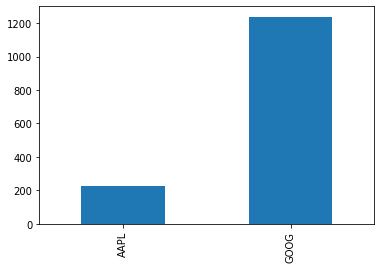

In [229]:
res.plot(kind="bar")

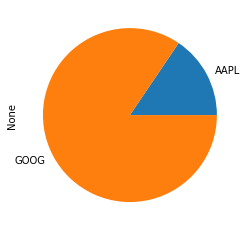

In [230]:
res.plot(kind="pie")

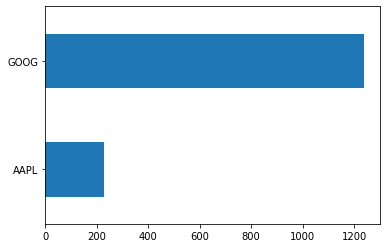

In [234]:
res.plot(kind="barh")

## DataFrame Plots

In [241]:
final.head(2)

Date        AAPL         GOOG       who_is_greater
0 2019-02-21  168.849930  1096.969971  (GOOG, 1096.969971)
1 2019-02-22  170.735229  1110.369995  (GOOG, 1110.369995)

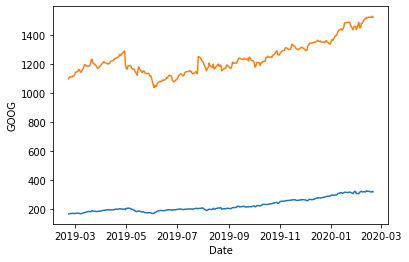

In [244]:
sns.lineplot(x="Date",y="AAPL", data=final)
sns.lineplot(x="Date",y="GOOG", data=final)

In [240]:
final_melted.head(3)

Date SYMBOL    AdjClose
0 2019-02-21   AAPL  168.849930
1 2019-02-22   AAPL  170.735229
2 2019-02-25   AAPL  171.978958

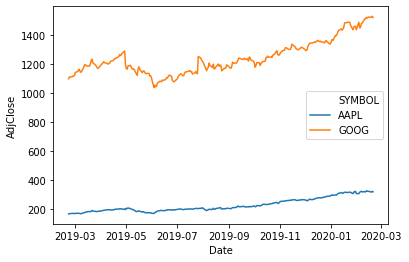

In [247]:
sns.lineplot(x="Date",y="AdjClose", data=final_melted, hue="SYMBOL")

In [248]:
tipsdf.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

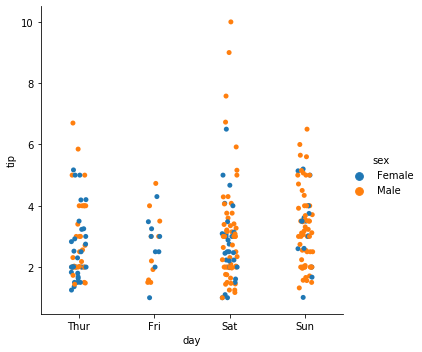

In [259]:
sns.catplot(x="day", y="tip",data=tipsdf, hue="sex", hue_order=['Female','Male'])

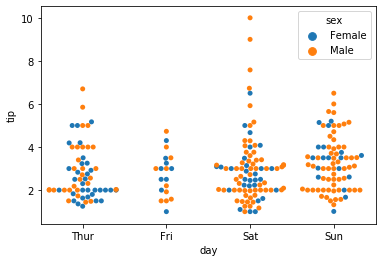

In [260]:
sns.swarmplot(x="day", y="tip",data=tipsdf, hue="sex", hue_order=['Female','Male'])

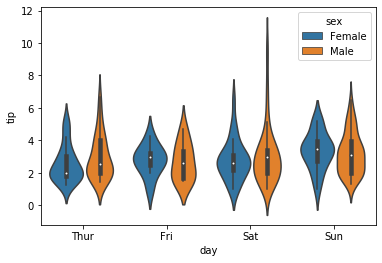

In [261]:
sns.violinplot(x="day", y="tip",data=tipsdf, hue="sex", hue_order=['Female','Male'])

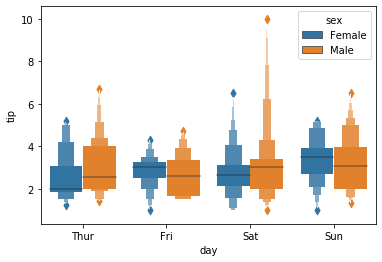

In [262]:
sns.boxenplot(x="day", y="tip",data=tipsdf, hue="sex", hue_order=['Female','Male'])

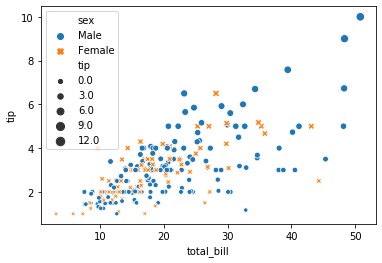

In [255]:
sns.scatterplot(x="total_bill", y="tip", data=tipsdf, hue="sex", style="sex", size="tip")

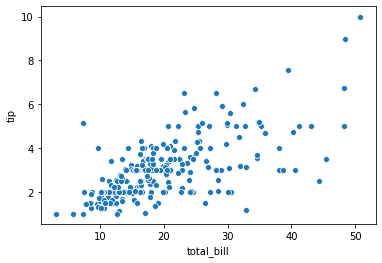

In [250]:
sns.scatterplot(x="total_bill", y="tip", data=tipsdf)

In [263]:
tipsdf.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

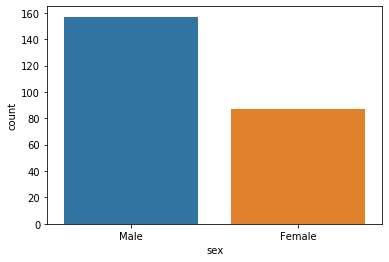

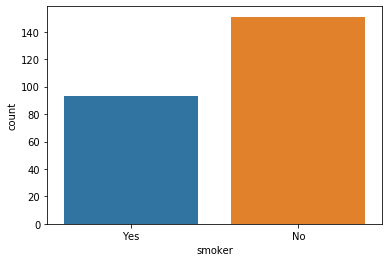

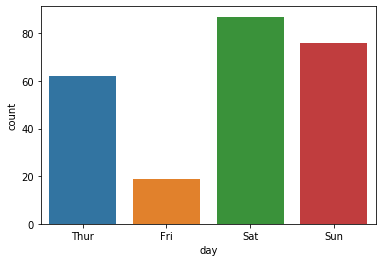

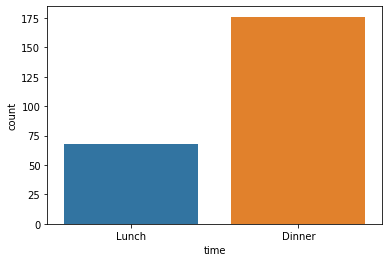

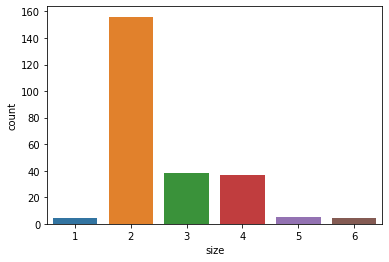

In [269]:
cols = ['sex','smoker','day','time','size']

for col in cols:
    fig = plt.figure()
    sns.countplot(tipsdf[col])
    plt.show()

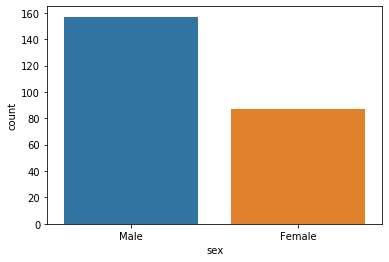

In [264]:
sns.countplot(tipsdf.sex)

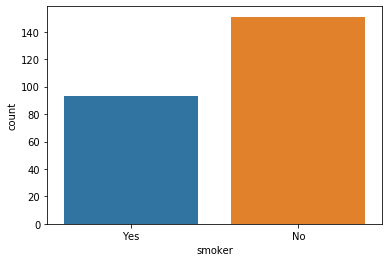

In [265]:
sns.countplot(tipsdf.smoker)

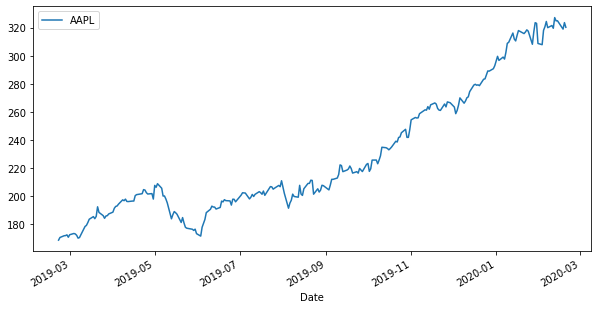

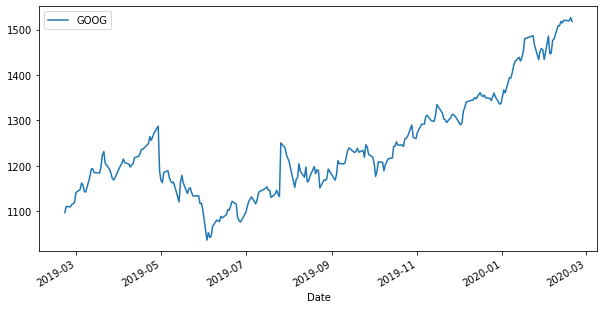

In [238]:
# final.plot(x="Date", y=["AAPL"], kind="line", figsize=(10,5))
# final.plot(x="Date", y="GOOG", kind="line", figsize=(10,5))

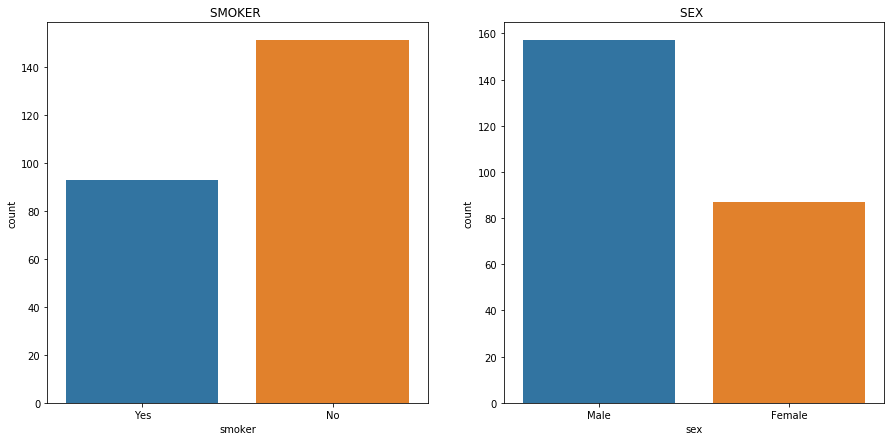

In [291]:
# sns.countplot(tipsdf.smoker,  )
# sns.countplot(tipsdf.time,  )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

ax[0].set_title("SMOKER ")
sns.countplot(tipsdf.smoker, ax=ax[0])

ax[1].set_title("SEX ")
sns.countplot(tipsdf.sex, ax=ax[1])

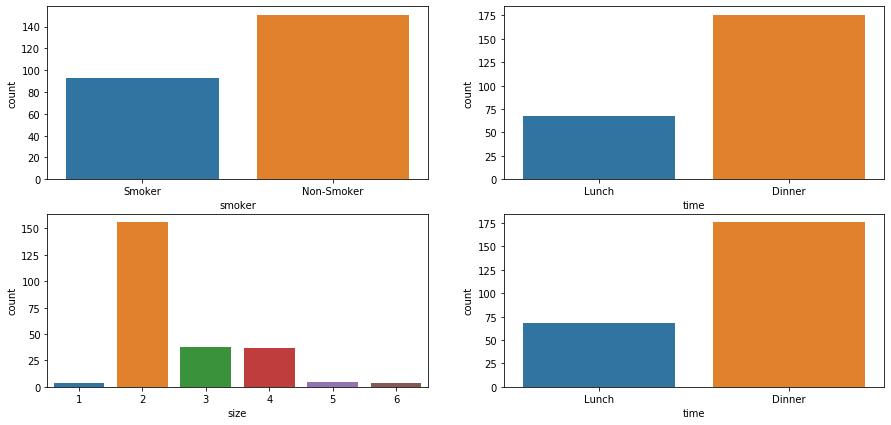

In [297]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,7))
ax = ax.flatten()

a = sns.countplot(tipsdf.smoker,  ax=ax[0])
a.set_xticklabels(['Smoker', 'Non-Smoker'])

sns.countplot(tipsdf.time,  ax=ax[1])
sns.countplot(tipsdf['size'],  ax=ax[2])
sns.countplot(tipsdf.time,  ax=ax[3])

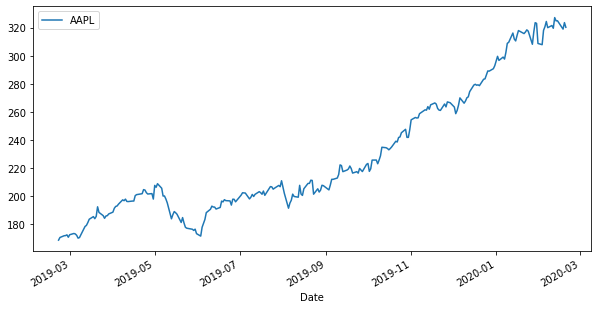

In [298]:
final.plot(x="Date", y=["AAPL"], kind="line", figsize=(10,5))
# final.plot(x="Date", y="GOOG", kind="line", figsize=(10,5))

In [300]:
# sns.lmplot(x="total_bill",y="tip", data=)
tipsdf.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4